In [15]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
processed_data = np.load('Full_array.npy')

from tensorflow import keras

import pandas as pd

#The size of the dataset is 10,000; but I only filled the first 9166 with values, the rest are zeros.
number = 9166
processed_data = processed_data[0:number]

In [16]:
#hyperparameters:
validation_split = 0.10
test_train_split = 0.85
batch_size = 64
epoch_number = 20
learning_rate = 0.1
dropout_rate = 0.3
CNL1_filters = 32
CNL1_kernal_size = 5
MPL1_pool_size= (2,2)
MPL1_strides = 2
CNL2_filters = 64
CNL2_kernal_size = 5
MPL2_pool_size = (2,2)
MPL2_strides = 2

#I have a non-round number of examples
train_split_indice = int(np.round(test_train_split*number))

In [17]:
#Load in my dataset of targets, targets are strings labels under the name "Class"
galaxyzoo = pd.read_csv("zoo2MainSpecz.csv/zoo2MainSpecz.csv", usecols=[2,3,4,8], nrows=number)
Class = galaxyzoo["gz2class"].values
RA = galaxyzoo['ra'].values
DEC = galaxyzoo['dec'].values

In [18]:
#I want to take the first character of the Class string and interpret as a integer, ala MNIST example code
dictionary = {'A':int(2),'E':int(1),'S':int(0)}

In [19]:
#resave using my dictionary
target = np.empty((len(Class)))
for i in range(len(Class)):
    target[i] = int(dictionary[Class[i][0]])

In [20]:
#split my data between training and test sets
train_target = target[0:train_split_indice]
test_target = target[train_split_indice:number]
train_images = processed_data[0:train_split_indice]
test_images = processed_data[train_split_indice:number]

train_images = train_images.reshape(train_split_indice,28,28,1)
test_images = test_images.reshape(train_split_indice-number,28,28,1)

In [21]:
#define my model, using a CNN with 2 Convolutional layers, 2 max pool layers, 1 dense layer, 1 drop out layer, and another dense layer 
def create_model(dropout_rate):
    
    model = keras.Sequential([])
    model.add(keras.layers.Conv2D(input_shape=(28,28,1),filters=CNL1_filters,kernel_size=CNL1_kernal_size,padding="same",activation=tf.nn.relu))
    model.add(keras.layers.MaxPool2D(pool_size=MPL1_pool_size, strides=MPL1_strides))
    model.add(keras.layers.Conv2D(filters=CNL2_filters,kernel_size=CNL2_kernal_size,padding="same",activation=tf.nn.relu))
    model.add(keras.layers.MaxPool2D(pool_size=MPL2_pool_size,strides=MPL2_strides))
    model.add(keras.layers.Reshape([7*7*64]))
    model.add(keras.layers.Dense(units=1024,activation=tf.nn.relu))
    model.add(keras.layers.Dropout(rate=dropout_rate))
    model.add(keras.layers.Dense(units=3,activation=tf.nn.softmax))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    return(model)

In [22]:
model = create_model(dropout_rate=dropout_rate)
history = model.fit(train_images, train_target, validation_split=validation_split, epochs=epoch_number, batch_size=batch_size, verbose=1, shuffle=True)

Train on 7011 samples, validate on 780 samples
Epoch 1/20
7011/7011 [==============================] - 24s 3ms/sample - loss: 0.6367 - accuracy: 0.6864 - val_loss: 0.5846 - val_accuracy: 0.6821
Epoch 2/20
7011/7011 [==============================] - 23s 3ms/sample - loss: 0.5406 - accuracy: 0.7557 - val_loss: 0.4987 - val_accuracy: 0.7833
Epoch 3/20
7011/7011 [==============================] - 23s 3ms/sample - loss: 0.5189 - accuracy: 0.7657 - val_loss: 0.5202 - val_accuracy: 0.7538
Epoch 4/20
7011/7011 [==============================] - 24s 3ms/sample - loss: 0.4879 - accuracy: 0.7883 - val_loss: 0.4886 - val_accuracy: 0.7949
Epoch 5/20
7011/7011 [==============================] - 23s 3ms/sample - loss: 0.4710 - accuracy: 0.7946 - val_loss: 0.6181 - val_accuracy: 0.6756
Epoch 6/20
7011/7011 [==============================] - 22s 3ms/sample - loss: 0.4536 - accuracy: 0.7977 - val_loss: 0.4430 - val_accuracy: 0.8000
Epoch 7/20
7011/7011 [==============================] - 22s 3ms/sample 

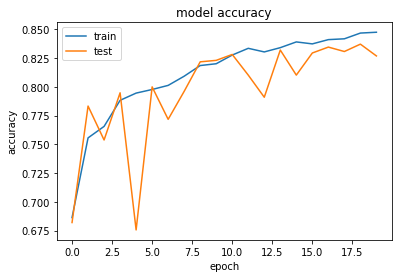

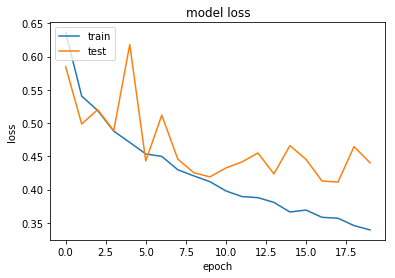

In [23]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('CNN_Learning_GZ2_3_15_19_epoch20_acc.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('CNN_Learning_GZ2_3_15_19_epoch20_loss.png')
plt.show()

In [24]:
#model.summary()
test_loss, test_acc = model.evaluate(test_images.reshape(number - train_split_indice,28,28,1), test_target)
print('Test accuracy:', test_acc)
#0.836 w/ 25 epochs, 0.3 dropout rate, batchsize = 64, LR = 0.001, no data augmentation
#0.816 w/ 27 epochs
#0.830 w/ 22 epochs
#0.808 w/ 17 epochs
#0.809 w/ 15 epochs
#0.817 w/ 40 epochs

#highest is 0.837 with 20 epochs



1375/1375 [==============================] - 1s 811us/sample - loss: 0.4349 - accuracy: 0.8371
Test accuracy: 0.8370909


<b>Update(5/11/19)</b> Below is the model accuracy for the above NN with epochs set to 40, all other hyperparameters the same as with the best case when epoch = 20. Part of what I would like mentoring on is how to interpret these graphs into making improvements, or what other types of graphs I should be implementing to understand my model. for instance, I have seen R.O.C. graphs in some blogposts, and have not implemented them because there is no point to implement them if I do not understand the basics, which I believe is the accuracy/epoch and loss/epoch that is below.

For instance, when I see this plot I notice that the accuracy and loss both have these unusual spikes, I interpret that as model instability and therefore I should reduce the LR.

epochs=40 scored a 0.817% accuracy

<img src='CNN_Learning_GZ2_3_15_19_epoch40_acc.png'>

<img src='CNN_Learning_GZ2_3_15_19_epoch40_loss.png'>

Below are the output graphs for the best case on this first attempt of my CNN, epochs=20, for austerity I have kept the hyperparameters the same.


<img src='CNN_Learning_GZ2_3_15_19_epoch20_acc.png'>

<img src='CNN_Learning_GZ2_3_15_19_epoch20_loss.png'>